#Regressão Linear

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

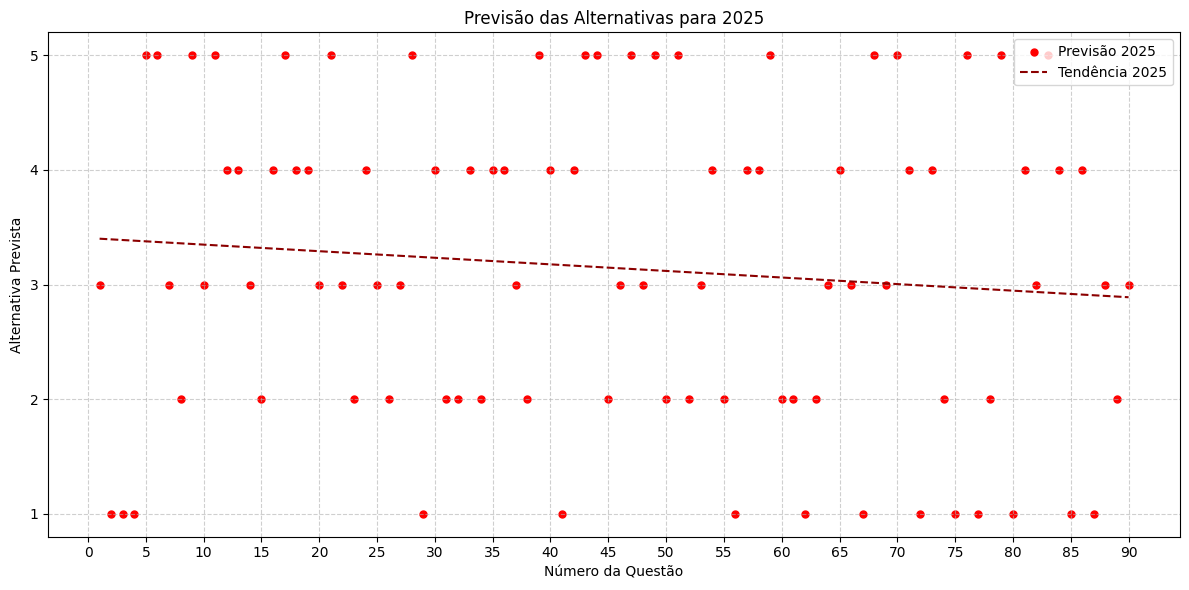

In [ ]:
df = pd.read_excel("GabaritosEnemsAzul.xlsx")

df.columns = df.columns.map(str)

y = df['Questoes'].values
X = df[['2020', '2021', '2022', '2023', '2024']].values
questoes = df['Questoes'].values.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(X, questoes.ravel())

regressor_2025 = LinearRegression()
regressor_2025.fit(X, df['Questoes'].values)

y_2025_pred = modelo.predict(X)

regressor_alt = LinearRegression()
regressor_alt.fit(X, df['2024'].values)
alt_2025_pred = regressor_alt.predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(df['Questoes'], alt_2025_pred, color='red', label='Previsão 2025', s=25)


trend = LinearRegression()
trend.fit(df['Questoes'].values.reshape(-1, 1), alt_2025_pred)
y_trend = trend.predict(df['Questoes'].values.reshape(-1, 1))
plt.plot(df['Questoes'], y_trend, color='darkred', linestyle='--', label='Tendência 2025')

plt.title('Previsão das Alternativas para 2025')
plt.xlabel('Número da Questão')
plt.ylabel('Alternativa Prevista')
plt.yticks([1, 2, 3, 4, 5])
plt.xticks(np.arange(0, 91, 5))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

##Predição/Score/Coeficiente Linear e Angular

In [ ]:
print(f'Predição: {regressor_2025.predict([[1, 2, 3, 4, 5]])}')
print(f'Score: {regressor_2025.score(X, y)}')
print(f'Coef. Linear: {regressor_2025.coef_}')

Predição: [32.72483093]
Score: 0.07197263374572149
Coef. Linear: [ 3.94746631 -1.86266145  0.41079546 -1.49358523 -2.56832839]


#Pearson


Questão 1: Alternativas com maior chance em 2025: [2 3 5]
Questão 2: Alternativas com maior chance em 2025: [2 5 4]
Questão 3: Alternativas com maior chance em 2025: [4 1 3]
Questão 4: Alternativas com maior chance em 2025: [1 5 3]
Questão 5: Alternativas com maior chance em 2025: [5 4 2]


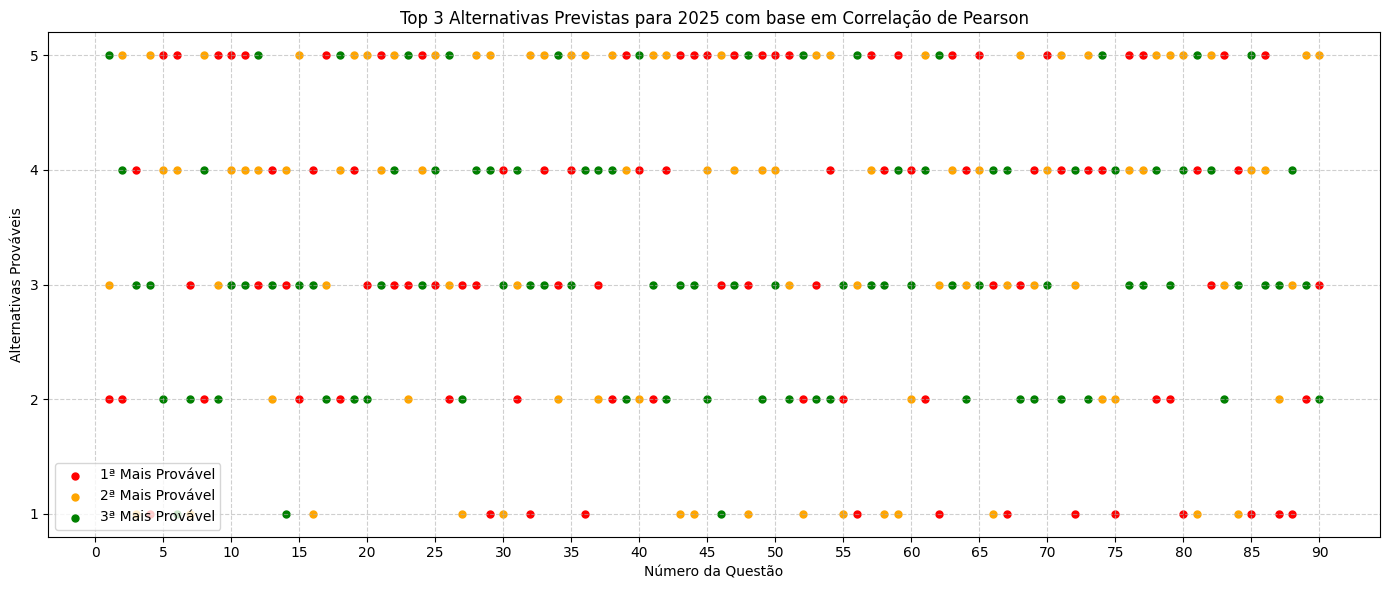

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_excel("GabaritosEnemsAzul.xlsx")
df.columns = df.columns.map(str)

anos = np.array([2020, 2021, 2022, 2023, 2024])
questoes = df['Questoes'].values
dados = df[['2020', '2021', '2022', '2023', '2024']].values

alternativas_previstas_2025 = []
todas_correlacoes = []

for linha in dados:
    correlacoes = []
    for alt in range(1, 6):
        binario = np.array([1 if valor == alt else 0 for valor in linha])
        if np.all(binario == binario[0]):
            correlacao = 0
        else:
            correlacao, _ = pearsonr(anos, binario)
        correlacoes.append(correlacao)
    todas_correlacoes.append(correlacoes)

    top_3 = np.argsort(correlacoes)[-3:][::-1]
    alternativas_previstas_2025.append(top_3 + 1)

alternativas_previstas_2025 = np.array(alternativas_previstas_2025)

for i in range(5):
    print(f"Questão {questoes[i]}: Alternativas com maior chance em 2025: {alternativas_previstas_2025[i]}")

plt.figure(figsize=(14, 6))
plt.scatter(questoes, alternativas_previstas_2025[:, 0], label='1ª Mais Provável', color='red', s=25)
plt.scatter(questoes, alternativas_previstas_2025[:, 1], label='2ª Mais Provável', color='orange', s=25)
plt.scatter(questoes, alternativas_previstas_2025[:, 2], label='3ª Mais Provável', color='green', s=25)

plt.title('Top 3 Alternativas Previstas para 2025 com base em Correlação de Pearson')
plt.xlabel('Número da Questão')
plt.ylabel('Alternativas Prováveis')
plt.yticks([1, 2, 3, 4, 5])
plt.xticks(np.arange(0, 91, 5))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Cohen

In [ ]:
for i, linha in enumerate(dados):
    correlacoes = []
    for alt in range(1, 6):
        binario = np.array([1 if valor == alt else 0 for valor in linha])
        if np.all(binario == binario[0]):
            correlacao = 0
        else:
            correlacao, _ = pearsonr(anos, binario)
        correlacoes.append(correlacao)
        print(f"Questão {questoes[i]} - Alternativa {alt}: Correlação de Pearson = {correlacao:.3f}")
    todas_correlacoes.append(correlacoes)

In [ ]:
correlacoes = {
    'Questão 1': {
        'Alternativa 1': -0.707,
        'Alternativa 2': 0.354,
        'Alternativa 3': 0.289
    },
    'Questão 2': {
        'Alternativa 1': -0.289,
        'Alternativa 2': 0.354
    },
    'Questão 3': {
        'Alternativa 1': 0.289,
        'Alternativa 4': 0.354,
        'Alternativa 5': -0.707
    },
    'Questão 4': {
        'Alternativa 1': 0.866,
        'Alternativa 2': -0.354,
        'Alternativa 4': -0.577
    },
    'Questão 5': {
        'Alternativa 3': -0.707,
        'Alternativa 5': 0.577
    }
}

In [ ]:
def classificar_correlacao(correlacao):
    if correlacao < -0.70:
        return "Muito forte negativa"
    elif -0.70 <= correlacao < -0.50:
        return "Forte negativa"
    elif -0.50 <= correlacao < -0.30:
        return "Moderada negativa"
    elif -0.30 <= correlacao < -0.10:
        return "Fraca negativa"
    elif -0.10 <= correlacao < 0.10:
        return "Muito fraca ou inexistente"
    elif 0.10 <= correlacao < 0.30:
        return "Fraca positiva"
    elif 0.30 <= correlacao < 0.50:
        return "Moderada positiva"
    elif 0.50 <= correlacao < 0.70:
        return "Forte positiva"
    elif 0.70 <= correlacao <= 1.00:
        return "Muito forte positiva"

for questao, alternativas in correlacoes.items():
    print(f"Analisando {questao}:")
    for alternativa, correlacao in alternativas.items():
        classificacao = classificar_correlacao(correlacao)
        print(f"  - {alternativa}: Correlação de Pearson = {correlacao:.3f} -> {classificacao}")
    print()

Analisando Questão 1:
  - Alternativa 1: Correlação de Pearson = -0.707 -> Muito forte negativa
  - Alternativa 2: Correlação de Pearson = 0.354 -> Moderada positiva
  - Alternativa 3: Correlação de Pearson = 0.289 -> Fraca positiva

Analisando Questão 2:
  - Alternativa 1: Correlação de Pearson = -0.289 -> Fraca negativa
  - Alternativa 2: Correlação de Pearson = 0.354 -> Moderada positiva

Analisando Questão 3:
  - Alternativa 1: Correlação de Pearson = 0.289 -> Fraca positiva
  - Alternativa 4: Correlação de Pearson = 0.354 -> Moderada positiva
  - Alternativa 5: Correlação de Pearson = -0.707 -> Muito forte negativa

Analisando Questão 4:
  - Alternativa 1: Correlação de Pearson = 0.866 -> Muito forte positiva
  - Alternativa 2: Correlação de Pearson = -0.354 -> Moderada negativa
  - Alternativa 4: Correlação de Pearson = -0.577 -> Forte negativa

Analisando Questão 5:
  - Alternativa 3: Correlação de Pearson = -0.707 -> Muito forte negativa
  - Alternativa 5: Correlação de Pearson

# Teorema de Bayes

In [ ]:
import pandas as pd

caminho_entrada = "GabaritosEnemsAzul - SEM 2024.xlsx"

df = pd.read_excel(caminho_entrada, sheet_name="Planilha1")

if "Unnamed: 0" in df.columns:
    df['Questão'] = df["Unnamed: 0"]
    df = df.drop(columns=["Unnamed: 0"])
else:
    df['Questão'] = df.index + 1

colunas_anos = [col for col in df.columns if isinstance(col, int)]
df_gabaritos = df[colunas_anos]

num_alternativas = 5

frequencias = df_gabaritos.apply(lambda x: x.value_counts(), axis=1).fillna(0) + 1
probabilidades = frequencias.div(frequencias.sum(axis=1), axis=0)

alternativa_mais_provavel = probabilidades.idxmax(axis=1)
prob_mais_alta = probabilidades.max(axis=1).round(3)

resultado = pd.DataFrame({
    "Questão": df["Questão"],
    "Alternativa_Mais_Provável": alternativa_mais_provavel,
    "Probabilidade": prob_mais_alta
})

In [ ]:
pd.set_option('display.max_rows', None)

print(resultado.to_string(index=False))

pd.reset_option('display.max_rows')

 Questão  Alternativa_Mais_Provável  Probabilidade
       1                          1          0.222
       2                          1          0.333
       3                          1          0.222
       4                          4          0.333
       5                          2          0.333
       6                          2          0.222
       7                          1          0.333
       8                          1          0.333
       9                          1          0.333
      10                          3          0.333
      11                          1          0.333
      12                          1          0.222
      13                          3          0.333
      14                          4          0.333
      15                          2          0.444
      16                          5          0.333
      17                          4          0.333
      18                          1          0.333
      19                       